In [2]:
#import libraies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
#create the dataframe
df = pd.read_csv('/content/imdb_movie_dataset.csv')
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [7]:
#To return no. of rows and no. of columns
df.shape

(1000, 12)

In [8]:
#To get information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [9]:
#Check for missing values
df.isnull().sum()

,0
Rank,0
Title,0
Genre,0
Description,0
Director,0
Actors,0
Year,0
Runtime (Minutes),0
Rating,0
Votes,0


In [10]:
#To find the missing values percentage
features_with_na = [features for features in df.columns if df[features].isnull().sum()>1]
for feature in features_with_na:
  print(feature,np.round(df[feature].isnull().mean(),4), '% missing value')

Revenue (Millions) 0.128 % missing value
Metascore 0.064 % missing value


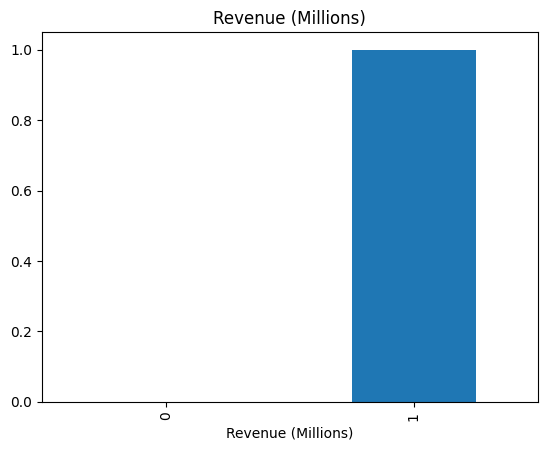

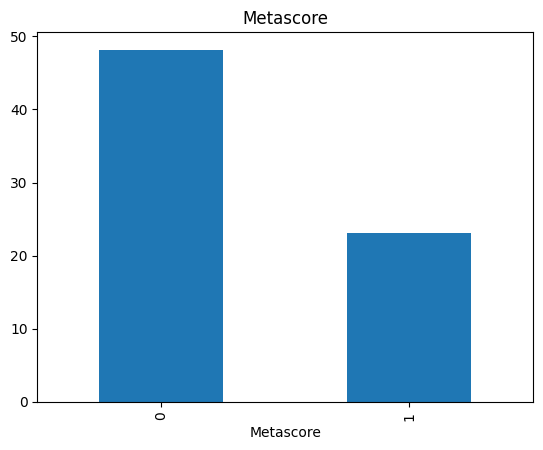

In [11]:
#To know whether missing value has an impact
for feature in features_with_na:
  data = df.copy()
  data[feature] = np.where(data[feature].isnull(),1,0)
  data.groupby(feature)['Revenue (Millions)'].median().plot.bar()
  plt.title(feature)
  plt.show()

In [12]:
#To drop missing values
df.dropna(axis=0)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
993,994,Resident Evil: Afterlife,"Action,Adventure,Horror",While still out to destroy the evil Umbrella C...,Paul W.S. Anderson,"Milla Jovovich, Ali Larter, Wentworth Miller,K...",2010,97,5.9,140900,60.13,37.0
994,995,Project X,Comedy,3 high school seniors throw a birthday party t...,Nima Nourizadeh,"Thomas Mann, Oliver Cooper, Jonathan Daniel Br...",2012,88,6.7,164088,54.72,48.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0


In [13]:
#check for duplicate data
duplicate_data = df.duplicated().any()
print(duplicate_data)

False


In [14]:
#To drop duplicate data
df = df.drop_duplicates()

In [15]:
#To get statistical information about the dataset
df.describe(include='all')

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000,1000,1000,1000,1000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
unique,NaN,999,207,1000,644,996,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,The Host,"Action,Adventure,Sci-Fi",A stuffy businessman finds himself trapped ins...,Ridley Scott,"Jennifer Lawrence, Josh Hutcherson, Liam Hemsw...",NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,50,1,8,2,NaN,NaN,NaN,NaN,NaN,NaN
mean,500.500000,NaN,NaN,NaN,NaN,NaN,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,NaN,NaN,NaN,NaN,NaN,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,NaN,NaN,NaN,NaN,NaN,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,NaN,NaN,NaN,NaN,NaN,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,NaN,NaN,NaN,NaN,NaN,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,NaN,NaN,NaN,NaN,NaN,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000


In [16]:
#In which year there was the highest average revenue
df.groupby('Year')['Revenue (Millions)'].mean().sort_values(ascending=False)

,Revenue (Millions)
Year,
2009,112.601277
2012,107.973281
2010,105.081579
2008,99.082745
2007,87.882245
2011,87.612258
2013,87.121818
2006,86.296667
2014,85.078723


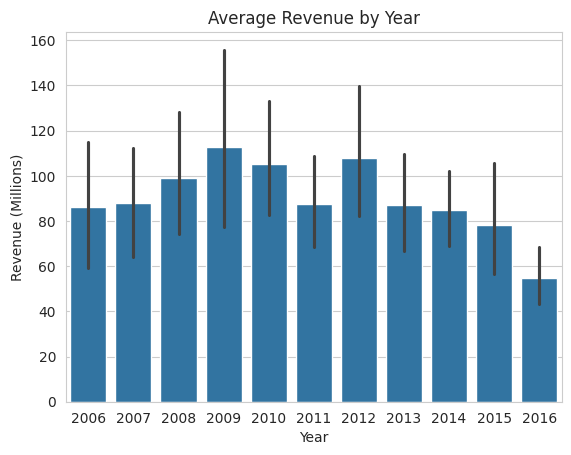

In [17]:
sns.set_style('whitegrid')
sns.barplot(x='Year', y='Revenue (Millions)', data=df)
plt.title('Average Revenue by Year')
plt.show()

In [18]:
#To get the average rating for each director
df.groupby('Director')['Rating'].mean().sort_values(ascending=False)

,Rating
Director,
Nitesh Tiwari,8.80
Christopher Nolan,8.68
Olivier Nakache,8.60
Makoto Shinkai,8.60
Florian Henckel von Donnersmarck,8.50
...,...
Micheal Bafaro,3.50
Jonathan Holbrook,3.20
Shawn Burkett,2.70


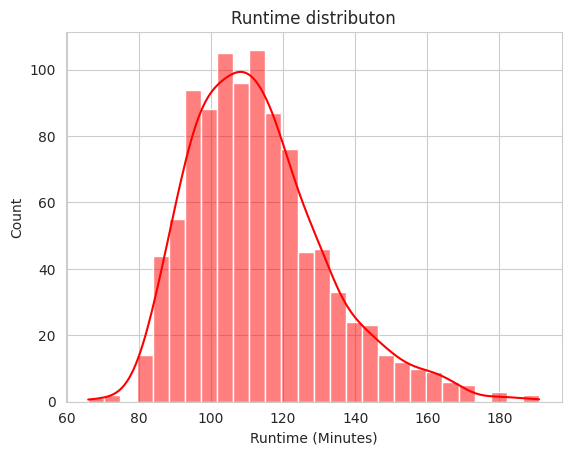

In [19]:
#Runtime distribution
sns.histplot(df['Runtime (Minutes)'], kde=True, color='red')
plt.title('Runtime distributon')
plt.xlabel('Runtime (Minutes)')
plt.show()

In [20]:
#To display top10 lengthy movies title and runtime
top10 =df.nlargest(10, 'Runtime (Minutes)')[['Title', 'Runtime (Minutes)']].set_index('Title')
print(top10)

                                          Runtime (Minutes)
Title                                                      
Grindhouse                                              191
The Hateful Eight                                       187
The Wolf of Wall Street                                 180
La vie d'Adèle                                          180
Inland Empire                                           180
Cloud Atlas                                             172
3 Idiots                                                170
Interstellar                                            169
Pirates of the Caribbean: At World's End                169
The Hobbit: An Unexpected Journey                       169


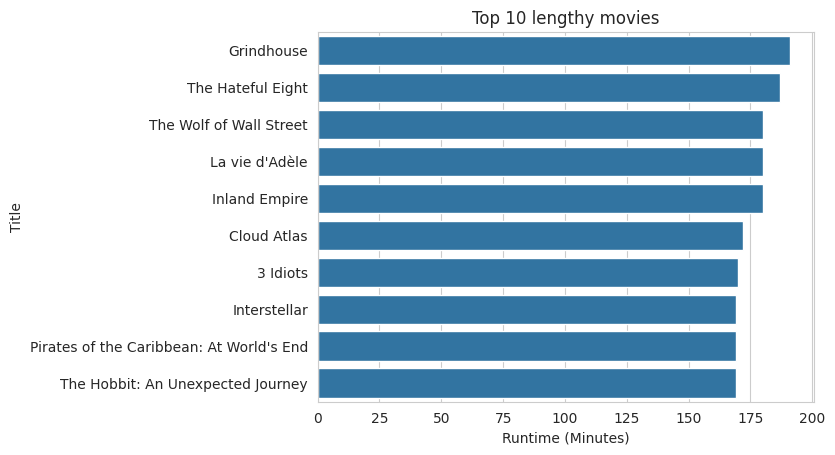

In [21]:
sns.set_style('whitegrid')
sns.barplot(x='Runtime (Minutes)', y=top10.index, data=top10)
plt.title('Top 10 lengthy movies')
plt.show()

In [22]:
#To get no. of movies per year
df['Year'].value_counts()

,count
Year,
2016,297
2015,127
2014,98
2013,91
2012,64
2011,63
2010,60
2007,53
2008,52


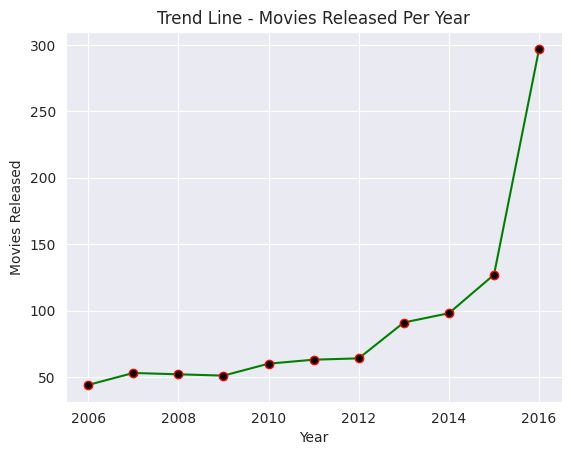

In [23]:
#To analyze the trend of movies released per year
sns.set_style('darkgrid')
df['Year'].value_counts().sort_index().plot(kind='line', marker='o', color='g', mec='r', mfc='black')
plt.xlabel('Year')
plt.ylabel('Movies Released')
plt.title('Trend Line - Movies Released Per Year')
plt.show()

In [24]:
#To find thetop 10 revenue generated movies
top10 = df.nlargest(10, 'Revenue (Millions)')[['Title', 'Revenue (Millions)']].set_index('Title')
print(top10)

                                            Revenue (Millions)
Title                                                         
Star Wars: Episode VII - The Force Awakens              936.63
Avatar                                                  760.51
Jurassic World                                          652.18
The Avengers                                            623.28
The Dark Knight                                         533.32
Rogue One                                               532.17
Finding Dory                                            486.29
Avengers: Age of Ultron                                 458.99
The Dark Knight Rises                                   448.13
The Hunger Games: Catching Fire                         424.65


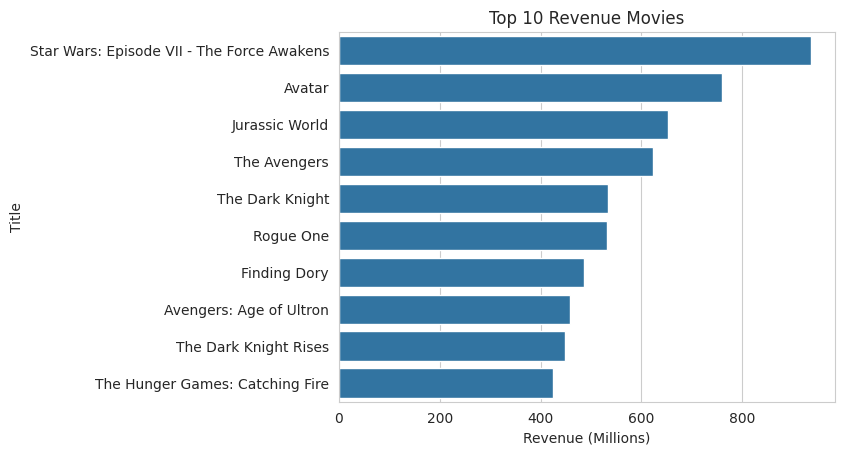

In [26]:
sns.set_style('whitegrid')
sns.barplot(x='Revenue (Millions)', y=top10.index, data=top10)
plt.title('Top 10 Revenue Movies')
plt.show()

In [28]:
df_corr=df[['Year', 'Runtime (Minutes)', 'Votes', 'Revenue (Millions)', 'Metascore', 'Rating']].dropna().corr()

<Axes: >

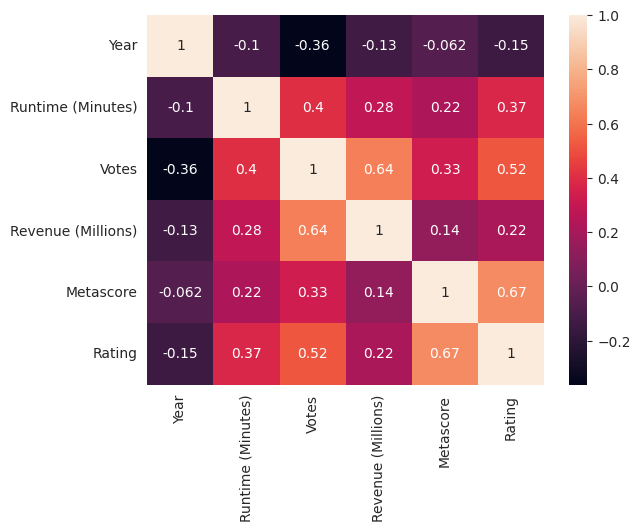

In [29]:
sns.heatmap(df_corr, annot=True)

In [30]:
#Changing the scale of metascore
df['Metascore'] = df['Metascore']/10

In [32]:
df.sort_values(by='Rating', ascending=False, inplace=True)

In [34]:
#to find the movies with metascore-rating < 0.5 and also with the rating > 8
data1 = df[abs(df['Metascore']-df['Rating'])<0.5]

#Top 5 movies
data1[(abs(df['Metascore']-df['Rating'])<0.5) & (df['Rating']>=8)].sort_index()[0:5]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
19,20,Arrival,"Drama,Mystery,Sci-Fi",When twelve mysterious spacecraft appear aroun...,Denis Villeneuve,"Amy Adams, Jeremy Renner, Forest Whitaker,Mich...",2016,116,8.0,340798,100.50,8.1
50,51,Star Wars: Episode VII - The Force Awakens,"Action,Adventure,Fantasy",Three decades after the defeat of the Galactic...,J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",2015,136,8.1,661608,936.63,8.1
74,75,Zootopia,"Animation,Adventure,Comedy","In a city of anthropomorphic animals, a rookie...",Byron Howard,"Ginnifer Goodwin, Jason Bateman, Idris Elba, J...",2016,108,8.1,296853,341.26,7.8
83,84,Gone Girl,"Crime,Drama,Mystery",With his wife's disappearance having become th...,David Fincher,"Ben Affleck, Rosamund Pike, Neil Patrick Harri...",2014,149,8.1,636243,167.74,7.9
99,100,The Departed,"Crime,Drama,Thriller",An undercover cop and a mole in the police att...,Martin Scorsese,"Leonardo DiCaprio, Matt Damon, Jack Nicholson,...",2006,151,8.5,937414,132.37,8.5


In [35]:
data1.sort_values(by='Rating', ascending=False, inplace=True)
data1.reset_index(drop=True, inplace=True)
data1[0:5]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,100,The Departed,"Crime,Drama,Thriller",An undercover cop and a mole in the police att...,Martin Scorsese,"Leonardo DiCaprio, Matt Damon, Jack Nicholson,...",2006,151,8.5,937414,132.37,8.5
1,477,The Lives of Others,"Drama,Thriller","In 1984 East Berlin, an agent of the secret po...",Florian Henckel von Donnersmarck,"Ulrich Mühe, Martina Gedeck,Sebastian Koch, Ul...",2006,137,8.5,278103,11.28,8.9
2,134,Whiplash,"Drama,Music",A promising young drummer enrolls at a cut-thr...,Damien Chazelle,"Miles Teller, J.K. Simmons, Melissa Benoist, P...",2014,107,8.5,477276,13.09,8.8
3,145,Django Unchained,"Drama,Western","With the help of a German bounty hunter , a fr...",Quentin Tarantino,"Jamie Foxx, Christoph Waltz, Leonardo DiCaprio...",2012,165,8.4,1039115,162.80,8.1
4,862,Koe no katachi,"Animation,Drama,Romance","The story revolves around Nishimiya Shoko, a g...",Naoko Yamada,"Miyu Irino, Saori Hayami, Aoi Yuki, Kenshô Ono",2016,129,8.4,2421,NaN,8.0


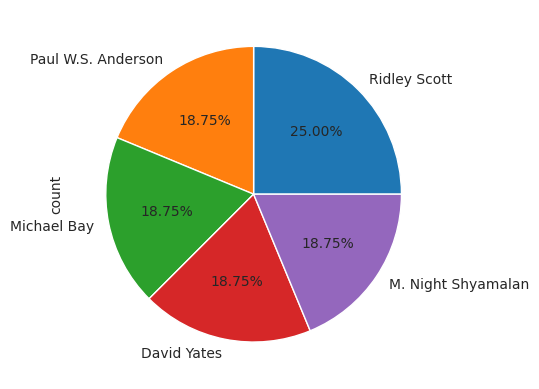

In [37]:
#Top 5 directors
df.Director.value_counts()[:5].plot.pie(autopct='%1.2f%%')
plt.show()